# Course : Statistical & machine learning approches for marketing
Title: Excerises Session 1

Name: Arnaud Vandelaer

In [3]:
#linair regression
# Import Advertising data
adver <- read.csv('C:/Users/avandelaer/Documents/Statistical & machine learning/SML_Section1_v2.1/data/Advertising.csv', row.names=1)
head(adver)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


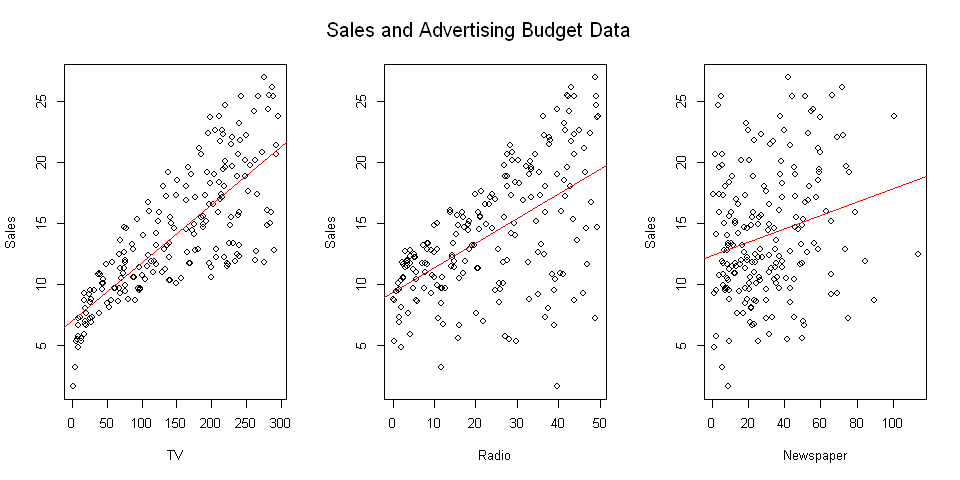

In [4]:
options(repr.plot.width=8, repr.plot.height=4)  #size
par(mfrow=c(1, 3))  # regions
plot(adver$TV, adver$sales, ylab="Sales", xlab="TV")
abline(lm(sales ~ TV, data=adver), col='red')
plot(adver$radio, adver$sales, ylab="Sales", xlab="Radio")
abline(lm(sales ~ radio, data=adver), col='red')
plot(adver$newspaper, adver$sales, ylab="Sales", xlab="Newspaper")
abline(lm(sales ~ newspaper, data=adver), col='red')

mtext("Sales and Advertising Budget Data", side=3, line=-2.5, outer=TRUE)

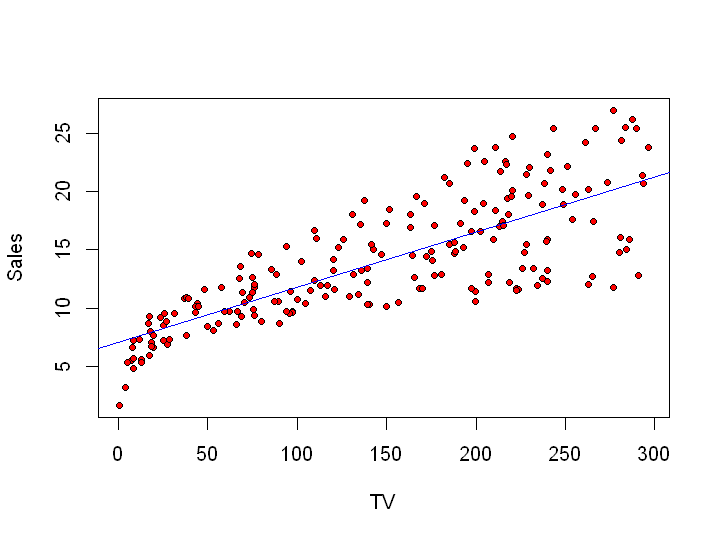

In [5]:

# Sales ~ TV
options(repr.plot.width=6, repr.plot.height=4.5)  # size

plot(adver$TV, adver$sales, pch=21, cex=0.8, bg='red',
     xlab='TV', ylab='Sales')
abline(lm(sales ~ TV, data=adver), col='blue')

In [6]:
#ex1

adver$num <- mapply(function (x,y) (x - mean(adver$TV)) * (y - mean(adver$sales)), adver$TV, adver$sales)
adver$denom <- mapply(function (x) (x - mean(adver$TV))**2, adver$TV)
B1 <- sum(adver$num) / sum(adver$denom)
                
B0 <- mean(adver$sales) - B1*mean(adver$TV)

print(paste("B0=",B0, "B1=", B1))

[1] "B0= 7.03259354912769 B1= 0.0475366404330197"


In [7]:
# Check B0, B1 by lm function
md <- lm(sales ~ TV, data=adver)
summary(md)


Call:
lm(formula = sales ~ TV, data = adver)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [8]:
#ex2

adver$num <- mapply(function (x,y) (x - mean(adver$radio)) * (y - mean(adver$sales)), adver$radio, adver$sales)
adver$denom <- mapply(function (x) (x - mean(adver$radio))**2, adver$radio)
B1 <- sum(adver$num) / sum(adver$denom)
                
B0 <- mean(adver$sales) - B1*mean(adver$radio)

print(paste("B0=",B0, "B1=", B1))

[1] "B0= 9.31163809515828 B1= 0.20249578339244"


In [9]:
# Check B0, B1 by lm function
summary(lm(sales ~ radio, data=adver))


Call:
lm(formula = sales ~ radio, data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [10]:
#ex3

adver$num    <- mapply(function (x,y) (x - mean(adver$TV)) * (y - mean(adver$sales)), adver$TV, adver$sales)
adver$denom  <- mapply(function (x) (x - mean(adver$TV))**2, adver$TV)
B1         <- sum(adver$num) / sum(adver$denom)           
B0         <- mean(adver$sales) - B1*mean(adver$TV)

adver$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adver$TV, adver$sales) 
RSS        <- sum(adver$rss)
RSE        <- (RSS/(nrow(adver)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(adver) + (mean(adver$TV))**2 / sum(adver$denom)))**0.5
SE_B1      <- (RSE**2/sum(adver$denom))**0.5 
                  
B0_ubound  <- B0 + 2 * SE_B0
B0_lbound  <- B0 - 2 * SE_B0
                     
B1_ubound  <- B1 + 2 * SE_B1
B1_lbound  <- B1 - 2 * SE_B1

#print(SE_B0)
#print(SE_B1)

print(paste("95% confidence interval B0:", B0_lbound, B0_ubound))
print(paste("95% confidence interval B1:", B1_lbound, B1_ubound))

[1] "95% confidence interval B0: 6.11690766858074 7.94827942967465"
[1] "95% confidence interval B1: 0.042155426057426 0.0529178548086135"


In [11]:
# Check
SE_B0 <- 0.457843
SE_B1 <- 0.002691

B0_ubound  <- B0 + 2 * SE_B0
B0_lbound  <- B0 - 2 * SE_B0
                     
B1_ubound  <- B1 + 2 * SE_B1
B1_lbound  <- B1 - 2 * SE_B1

print(paste("95% confidence interval B0:", B0_lbound, B0_ubound))
print(paste("95% confidence interval B1:", B1_lbound, B1_ubound))

[1] "95% confidence interval B0: 6.11690754912769 7.94827954912769"
[1] "95% confidence interval B1: 0.0421546404330197 0.0529186404330197"


In [12]:
#ex4
adver$num    <- mapply(function (x,y) (x - mean(adver$radio)) * (y - mean(adver$sales)), adver$radio, adver$sales)
adver$denom  <- mapply(function (x) (x - mean(adver$radio))**2, adver$radio)
B1         <- sum(adver$num) / sum(adver$denom)           
B0         <- mean(adver$sales) - B1*mean(adver$radio)

adver$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adver$radio, adver$sales) 
RSS        <- sum(adver$rss)
RSE        <- (RSS/(nrow(adver)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(adver) + (mean(adver$radio))**2 / sum(adver$denom)))**0.5
SE_B1      <- (RSE**2/sum(adver$denom))**0.5 

t          <- (B1 - 0) / SE_B1
p          <- 2*pt(t, nrow(adver)-1, lower=FALSE)

print(paste("T-Statistic: ", t))

[1] "T-Statistic:  9.92076547282496"


In [13]:
# Double check with the lm function
md <- lm(sales ~ TV, data=adver)
summary(md)


Call:
lm(formula = sales ~ TV, data = adver)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [14]:
# Show the model of Sales ~ f(Radio)
md <- lm(sales ~ radio, data=adver)
summary(md)


Call:
lm(formula = sales ~ radio, data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [15]:

adver$num    <- mapply(function (x,y) (x - mean(adver$newspaper)) * (y - mean(adver$sales)), adver$newspaper, adver$sales)
adver$denom  <- mapply(function (x) (x - mean(adver$newspaper))**2, adver$newspaper)
B1         <- sum(adver$num) / sum(adver$denom)           
B0         <- mean(adver$sales) - B1*mean(adver$newspaper)

adver$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adver$newspaper, adver$sales) 
RSS        <- sum(adver$rss)
RSE        <- (RSS/(nrow(adver)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(adver) + (mean(adver$newspaper))**2 / sum(adver$denom)))**0.5
SE_B1      <- (RSE**2/sum(adver$denom))**0.5 

t          <- (B1 - 0) / SE_B1
p          <- 2*pt(t, nrow(adver)-1, lower=FALSE)

print(paste("T-Statistic: ", t))

[1] "T-Statistic:  3.29959074363342"


In [16]:

# Show the model of Sales ~ f(Newspaper)
md <- lm(sales ~ newspaper, data=adver)
summary(md)


Call:
lm(formula = sales ~ newspaper, data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [17]:
#ex5
adver$num    <- mapply(function (x,y) (x - mean(adver$radio)) * (y - mean(adver$sales)), adver$radio, adver$sales)
adver$denom  <- mapply(function (x) (x - mean(adver$radio))**2, adver$radio)
B1         <- sum(adver$num) / sum(adver$denom)           
B0         <- mean(adver$sales) - B1*mean(adver$radio)

adver$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adver$radio, adver$sales) 
RSS        <- sum(adver$rss)
RSE        <- (RSS/(nrow(adver)-2))**0.5

adver$y2     <- mapply(function (x) (x - mean(adver$sales))**2, adver$sales)
Cor_XY     <- sum(adver$num) / ((sum(adver$denom)**0.5) * (sum(adver$y2)**0.5))
R2         <- Cor_XY**2
                     
print(paste("RSE:", RSE, " R2", R2))

[1] "RSE: 4.27494435490106  R2 0.332032455445296"


In [18]:

# Show the model of Sales ~ f(Radio)
md <- lm(sales ~ radio, data=adver)
summary(md)


Call:
lm(formula = sales ~ radio, data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [19]:
adver$num    <- mapply(function (x,y) (x - mean(adver$newspaper)) * (y - mean(adver$sales)), adver$newspaper, adver$sales)
adver$denom  <- mapply(function (x) (x - mean(adver$newspaper))**2, adver$newspaper)
B1         <- sum(adver$num) / sum(adver$denom)           
B0         <- mean(adver$sales) - B1*mean(adver$newspaper)

adver$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adver$newspaper, adver$sales) 
RSS        <- sum(adver$rss)
RSE        <- (RSS/(nrow(adver)-2))**0.5

adver$y2     <- mapply(function (x) (x - mean(adver$sales))**2, adver$sales)
Cor_XY     <- sum(adver$num) / ((sum(adver$denom)**0.5) * (sum(adver$y2)**0.5))
R2         <- Cor_XY**2
                     
print(paste("RSE:", RSE, " R2", R2))

[1] "RSE: 5.09248036652019  R2 0.0521204454443051"


In [20]:
# Show the model of Sales ~ f(Newspaper)
md <- lm(sales ~ newspaper, data=adver)
summary(md)


Call:
lm(formula = sales ~ newspaper, data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [21]:
#ex6
# β = ((X'X)**-1)X'y
X <- as.matrix(cbind(1, adver$TV, adver$radio, adver$newspaper))
y <- as.matrix(adver$sales)

B <- solve(t(X) %*% X) %*% t(X) %*% y

for (coef in 1:nrow(B)){print(paste(coef, "Coefficient:", B[coef]))}


[1] "1 Coefficient: 2.93888936945944"
[1] "2 Coefficient: 0.0457646454553974"
[1] "3 Coefficient: 0.188530016918204"
[1] "4 Coefficient: -0.00103749304247596"


In [22]:

# Compare with the function of R
md <- lm(sales ~ ., data=adver)
summary(md)


Call:
lm(formula = sales ~ ., data = adver)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0522  -0.7168   0.3045   1.0974   2.9067 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.9210985  0.3075467   9.498  < 2e-16 ***
TV           0.0453246  0.0013704  33.074  < 2e-16 ***
radio        0.1844936  0.0092864  19.867  < 2e-16 ***
newspaper    0.0022167  0.0067476   0.329  0.74287    
num          0.0028070  0.0009748   2.880  0.00443 ** 
denom       -0.0003207  0.0001841  -1.742  0.08315 .  
rss          0.0060714  0.0040842   1.487  0.13876    
y2                  NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.646 on 193 degrees of freedom
Multiple R-squared:  0.9034,	Adjusted R-squared:  0.9004 
F-statistic:   301 on 6 and 193 DF,  p-value: < 2.2e-16


### BOOK

Exercise 2 (p.52, Chap.2)

A

Regression
p=record profit, number of employees, industry, ceo salary = 4
n=500
inference: factors that affect CEO salary
B

Classification
p=price charged, marketing budget, competition price, + 10 variables = 13
n=20
prediction: whether it will be a success or failure
C

regression
p=% change USD/EUR, % change US market, % change British market, % change German market=4
n=52 (nr weeks per year)
prediction: "predicting the % change in the USD/EUR exchange rate..."



crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

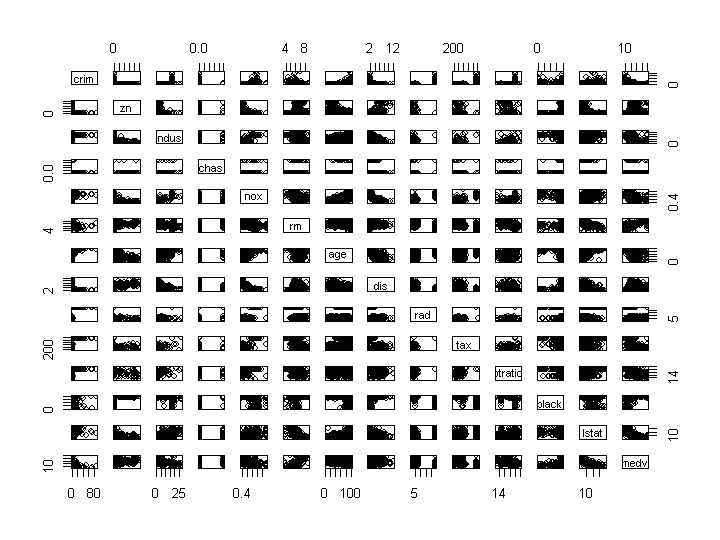

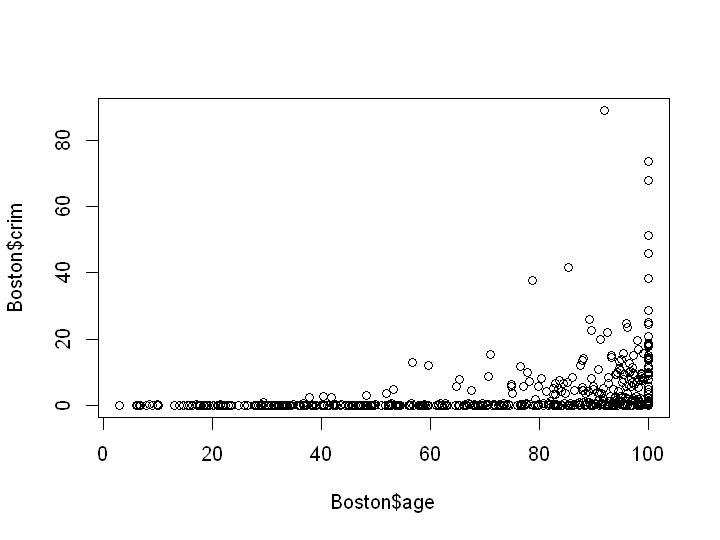

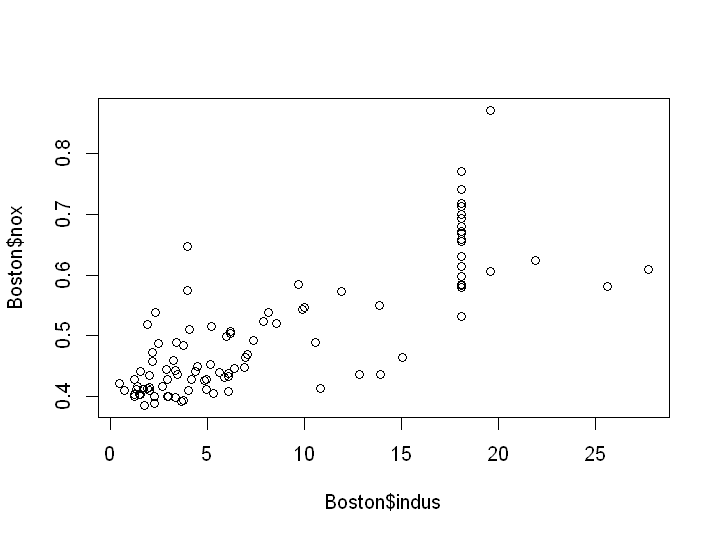

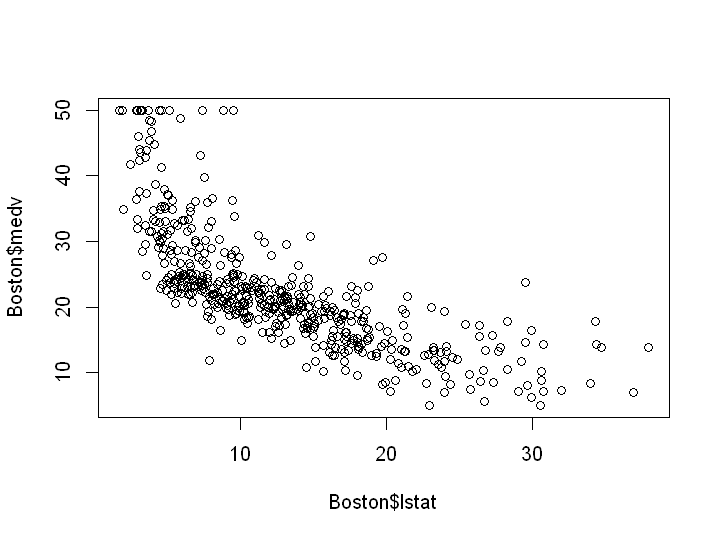

In [23]:
#Exercise 10 (p.56, Chap.2)

#A
library(MASS)
head(Boston)
dim(Boston)
#?Boston

#B
pairs(Boston)

plot(Boston$age, Boston$crim)
# Crime goes rises (exponentially after ~70%) with the amount of units built prior 1940

plot(Boston$indus,Boston$nox)
# The more industrial parks, the more nitrogen oxcides concentration

plot(Boston$lstat,Boston$medv)
# lower status of the population shows negative correlation with median value of owner-occupied homes in $1000s.

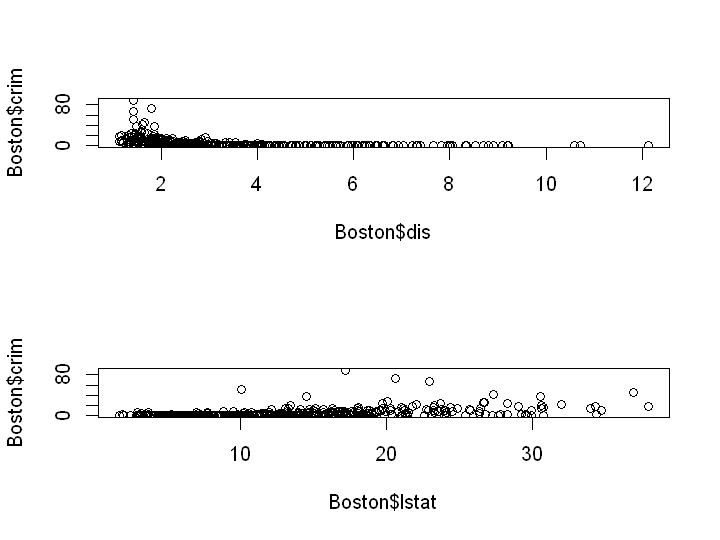

In [24]:
#c
par( mfrow = c(2,1) )

# dis: weighted mean of distances to five Boston employment centres
plot(Boston$dis, Boston$crim)
# in close distance to an employment center, the crime rate rises 

# lstat: lower status of the population (percent)
plot(Boston$lstat, Boston$crim)
# with growing lstat, the avg. crime rate rises as well and gets more variance 
# in areas with low lstat (<10%), the crime rate is consistently lower than 5% (or very close to 0%)

      crim               tax           ptratio     
 Min.   : 0.00632   Min.   :187.0   Min.   :12.60  
 1st Qu.: 0.08204   1st Qu.:279.0   1st Qu.:17.40  
 Median : 0.25651   Median :330.0   Median :19.05  
 Mean   : 3.61352   Mean   :408.2   Mean   :18.46  
 3rd Qu.: 3.67708   3rd Qu.:666.0   3rd Qu.:20.20  
 Max.   :88.97620   Max.   :711.0   Max.   :22.00  

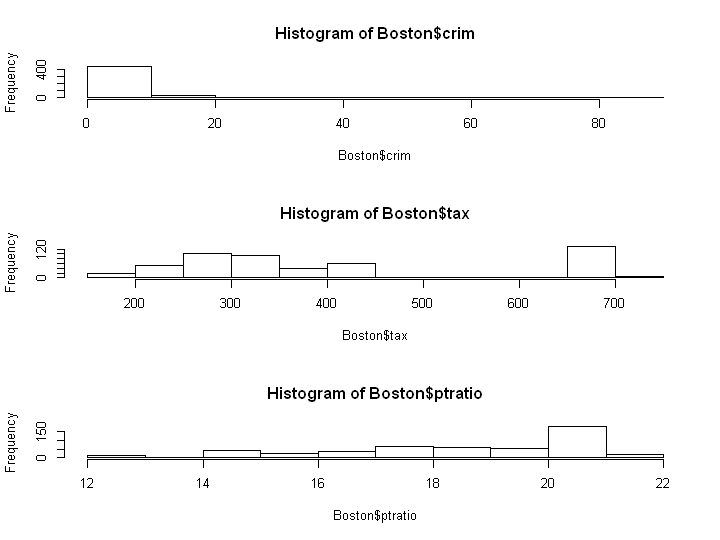

In [25]:
summary(Boston[,c("crim", "tax", "ptratio")])

par( mfrow = c(3,1) )

#Crim
hist(Boston$crim)
# Mean and Median a very far apart from the max value. This indicates that there are a few outliers (subsurbs with a signifivcantly higher crime rate than the rest)

#Tax
hist(Boston$tax)
# Some suburbs seem to have a significantly higher tax rate than the average one. There is a gap between the average/ low tax rate and very high tax rates

#Ptratio
hist(Boston$ptratio)
# The ptratio ranges from 12.6 to 22 pupils per teacher with an average of ~18.5. So some suburbs have a very low number of students per teacher.

In [26]:

#E
sum(Boston$chas)
#35 suburbs are bound to the Charles River

#F
median(Boston$ptratio)
#median ptratio = 19.05

#G
Boston[Boston$medv == min(Boston$medv),]

summary(Boston)
# age -> very old buildings
# crime rate -> very high
# black -> maximum / very close to maximum
# ptratio -> high
# lstat -> high percentage of lower status population

[1] 35

[1] 19.05

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [27]:
#Exercise 3 (p.120, Chap.3)

#A
#salary = B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
B0 <- 50
B1 <- 20
B2 <- 0.07
B3 <- 35
B4 <- 0.01
B5 <- -10

iq <- 110
gpa <- 4

gender_f <- 1
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("F",salary))

gender_f <- 0
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("M",salary))
#Answer iii -> For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough (>3.5)

#B
#Answer: 137.1

#C
#Answer: FALSE, The impact of the interaction term is measured in the unit of the coefficients.
#If the amount of gpa or iq is high, the interaction effect (1% increase) results in a bigger impact as well

[1] "F 137.1"
[1] "M 142.1"


In [28]:
#Exercise 10 (p.123, Chap.3)
library(ISLR)
head(Carseats, 2)
#?Carseats

#A
lm.fit <- lm(Sales ~ Price + Urban + US, data = Carseats)
summary(lm.fit)

#B
#B0 y intercept -> with all the other coefficients being 0, the sales are 13.04
#B1 (price) -> significant (p-value < 0.05), negative: the higher the price, the lower the sales
#B2 (UrbanYes) -> not significant (p-value > 0.05) negative impact on sales
#B3 (USYes) -> significant (p-value < 0.05) positive: if store is in the US, sales are higher 

#C
sales <- Price <- UrbanYes <- USYes <- 0
lm.fit$coeff
sales <- B0 + B1 * Price + B2 * UrbanYes + B3 * USYes

#D
#Urban -> p-value = 0.936 > 0.05 so Urban is on a 95% confidence level not statistically relevant

#E
lm.fit1 <- lm(Sales ~ Price + US, data = Carseats)
summary(lm.fit1)

#F
#R2 for Model 1 = 0.2335 ~ R2 Model 2 = 0.2354
# both models only explain 23% of the total variance for sales in the dataset

#G
confint(lm.fit1, level = 0.95)

#H
summary(Carseats[,c("Sales", "Price", "US")])
#there is no evidence for outliers or high leverage observation points

Warning message:
"package 'ISLR' was built under R version 3.6.2"

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(Intercept)       Price    UrbanYes       USYes 
13.04346894 -0.05445885 -0.02191615  1.20057270


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


     Sales            Price         US     
 Min.   : 0.000   Min.   : 24.0   No :142  
 1st Qu.: 5.390   1st Qu.:100.0   Yes:258  
 Median : 7.490   Median :117.0            
 Mean   : 7.496   Mean   :115.8            
 3rd Qu.: 9.320   3rd Qu.:131.0            
 Max.   :16.270   Max.   :191.0            

In [29]:
#Exercise 15 (p.126, Chap.3)
#?Boston

#A
sum <- NULL
for (coeff in names(Boston)){
    lm.fit <- lm(Boston$crim ~ Boston[,coeff])
    t <- summary(lm.fit)$coefficients[2,]
    sum <- cbind(sum, t)
    colnames(sum)[ncol(sum)] <- coeff
}
sum

sum[, sum[4,] < 0.05]
#All coefficients are significant on an individual level

Warning message in summary.lm(lm.fit):
"essentially perfect fit: summary may be unreliable"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Estimate,1.000000e+00,-7.393498e-02,5.097763e-01,-1.8927766,3.124853e+01,-2.684051e+00,1.077862e-01,-1.550902e+00,6.179109e-01,2.974225e-02,1.151983e+00,-3.627964e-02,5.488048e-01,-3.631599e-01
Std. Error,5.640901e-18,1.609460e-02,5.102433e-02,1.5061155,2.999190e+00,5.320411e-01,1.273644e-02,1.683300e-01,3.433182e-02,1.847415e-03,1.693736e-01,3.873154e-03,4.776097e-02,3.839017e-02
t value,1.772767e+17,-4.593776e+00,9.990848e+00,-1.2567274,1.041899e+01,-5.044819e+00,8.462825e+00,-9.213458e+00,1.799820e+01,1.609939e+01,6.801430e+00,-9.366951e+00,1.149065e+01,-9.459710e+00
Pr(>|t|),0.000000e+00,5.506472e-06,1.450349e-21,0.2094345,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27,1.173987e-19


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Estimate,1.000000e+00,-7.393498e-02,5.097763e-01,3.124853e+01,-2.684051e+00,1.077862e-01,-1.550902e+00,6.179109e-01,2.974225e-02,1.151983e+00,-3.627964e-02,5.488048e-01,-3.631599e-01
Std. Error,5.640901e-18,1.609460e-02,5.102433e-02,2.999190e+00,5.320411e-01,1.273644e-02,1.683300e-01,3.433182e-02,1.847415e-03,1.693736e-01,3.873154e-03,4.776097e-02,3.839017e-02
t value,1.772767e+17,-4.593776e+00,9.990848e+00,1.041899e+01,-5.044819e+00,8.462825e+00,-9.213458e+00,1.799820e+01,1.609939e+01,6.801430e+00,-9.366951e+00,1.149065e+01,-9.459710e+00
Pr(>|t|),0.000000e+00,5.506472e-06,1.450349e-21,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27,1.173987e-19


In [30]:
#C
library(tidyr)
par1 <- t(sum1)
par1 <- par1[,2:ncol(par1)]
par <- sum[,2:ncol(sum)]

par
par1

plot(par[1,], par1[1,], col=factor(colnames(par)))

#D
#Yes, The plots from do not show a simple linear relationship between response and predictor variables
# predictor variables "rad" and "black"

Warning message:
"package 'tidyr' was built under R version 3.6.2"

ERROR: Error in t(sum1): object 'sum1' not found
